Hi,

This notebook demonstrates the use of this repository, which implements the Sellke construction in a variety of settings. The Sellke construction is a reformulation of the classic stochastic epidemic, where an individual makes contact with another individual at the time points of a poisson process. If contact occurs from a susceptible to an infected, then they become infected.

Instead, the Sellke constrcution allows for more complex behaviour, as it fundamentally models the probability of infection and time to infection as a survival analysis problem.

Formally, we define the Sellke construction as:
* 1)The length of the $i^{th}$ infection is given by $T_i$, where $T_i$ is drawn from an arbitrary positive distribution. After $T_i$ has passed since the initial infection, the infected inidividual will recover
* 2) The $j^{th}$ susceptible individual has a resistance to infection denoted by $Q_j \sim\exp(1)$
* 3) Suppose $\Delta t$ time has passed since an individual was infected. Assuming they have not recovered, they are emitting hazard at rate $h(\Delta t)$ where $h(.)$ is some hazard function.
* 4) An individual becomes infectious once the cumulative hazard exceeds their resistance to infection.

For this first epidemic, we take:
* Population size, $N = 200$
* Hazard rate $h(t) = 0.008$, which corresponds to a thinned poisson process with thinning parameter of 0.008
* Infection period are distributed exponentially with paramter = 1.5
* There are 5 infected to begin with.

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from SellkeSimulation.simulation_code import SIR_Selke

In [2]:
epidemic_simulation = SIR_Selke(N = 200, beta = 0.008, I_parameters = 1.5, initial_infected = 1)
epidemic_simulation.compute_final_size()

Taking the exponential distribution of the length of the infectious periods.


176

We can generate repeated obsrations easily. The following code generates 10 more observations from the epidemic we previouslt defined.

In [3]:
data = epidemic_simulation.sim_final_size(10)
print(data)

Performing 10 iterations!
[176, 176, 173, 179, 173, 168, 188, 179, 180, 185]


Performing 10000 iterations!


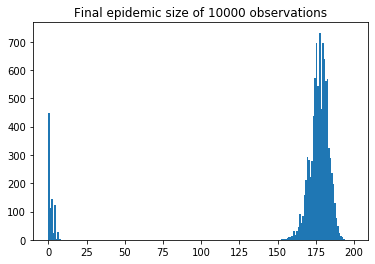

In [4]:
epidemic_simulation.sim_final_size(10000)
epidemic_simulation.plot_hist()

Lets use a different distribution for the length of the infectious periods. At the end of each unit of time you have a 50% chance to recover.

Performing 1000 iterations!


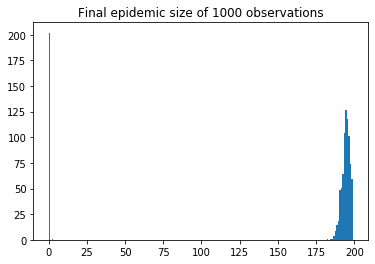

In [5]:
epidemic_simulation = SIR_Selke(N = 200,
                             beta = 0.008,
                             I_parameters = 0.5,
                             initial_infected = 1,
                             infection_period_distribution = np.random.geometric
                            )
epidemic_simulation.sim_final_size(1000)
epidemic_simulation.plot_hist()

Now, for the hazard function. Because we chose a constant hazard rate, the times until infection is exponentially distributed.

The following hazard rate 
$h(t) = \frac{(\beta/\alpha)(t/\alpha)^{(\beta-1)}}{1 + (t/\alpha)}$
gives rise to a more realistic infectious period profile.

(also waiting times that are log-logistic distributed)


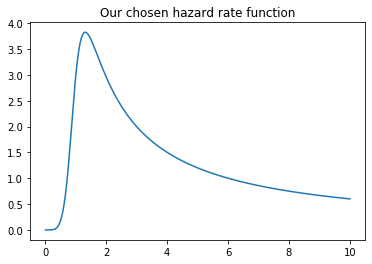

In [6]:
alpha = 1
beta = 6
h = lambda t : (beta/alpha)*(t/alpha)**(beta - 1)/(1 + (t/alpha)**beta)

x= np.linspace(0, 10, 1000)
h_x = h(x)
plt.title("Our chosen hazard rate function")
plt.plot(x, h_x)

This leads to the following final size distribution:

Performing 1000 iterations!


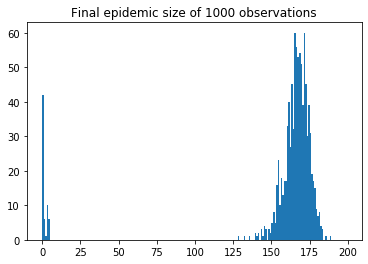

In [7]:
epidemic_simulation = SIR_Selke(N = 200,
                             beta = 0.001,
                             I_parameters = 0.1,
                             initial_infected = 1,
                             infection_period_distribution = np.random.geometric,
                             hazard_rate = h
                            )


epidemic_simulation.sim_final_size(1000)
epidemic_simulation.plot_hist()